**Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

The matrix that we get after multiplication will be of size (n,m) and in each cell, we are multiplying k times.
* So, Total multiplication will be n*m*k
* In each cell, there is k multiplication and k-1 addition.
 * So, total addition will be n*m*(k-1)


**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [26]:
import random
import time
import numpy as np

def matrix_multiply_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])


    C = [[0 for _ in range(m)] for _ in range(n)]


    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C


n, k, m = 200, 300, 150
A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]


start_time = time.time()
C_list = matrix_multiply_list(A, B)
end_time = time.time()
time_list = end_time - start_time

print(f"Time taken for matrix multiplication using list of lists: {time_list} seconds")

A_np = np.array(A)
B_np = np.array(B)


start_time = time.time()
C_np = np.dot(A_np, B_np)
end_time = time.time()
time_np = end_time - start_time

print(f"Time taken for matrix multiplication using NumPy: {time_np} seconds")




if time_list > time_np:
    print("NumPy is faster.")
else:
    print("List of lists is faster.")


Time taken for matrix multiplication using list of lists: 2.9827466011047363 seconds
Time taken for matrix multiplication using NumPy: 0.0010683536529541016 seconds
NumPy is faster.


Numpy has optimized algorithm and efficient memory usage,so it is faster.

**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

the time complexity of finding the median of the array is o(n^2)
Quickselect algorithm is better method, which has an average time complexity of
O(n). and also numpy method.


In [29]:
import numpy as np
import time
import random

def find_kth_largest(arr, k):

    if len(arr) == 1:
        return arr[0]

    pivot = np.random.choice(arr)
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]

    if k < len(highs):
        return find_kth_largest(highs, k)
    elif k < len(highs) + len(pivots):
        return pivots[0]
    else:
        return find_kth_largest(lows, k - len(highs) - len(pivots))

def median_quickselect(arr):

    n = len(arr)
    if n % 2 == 1:
        return find_kth_largest(arr, n // 2)
    else:
        left = find_kth_largest(arr, n // 2 - 1)
        right = find_kth_largest(arr, n // 2)
        return (left + right) / 2


np.random.seed(0)
n = 1000
array = np.random.randint(0, 10000, size=n)


start_time = time.time()
sorted_array = sorted(array)
median_sort = (sorted_array[n // 2] if n % 2 != 0 else (sorted_array[n // 2 - 1] + sorted_array[n // 2]) / 2)
time_sort = time.time() - start_time


start_time = time.time()
median_quickselect_val = median_quickselect(array.tolist())
time_quickselect = time.time() - start_time


start_time = time.time()
median_numpy = np.median(array)
time_numpy = time.time() - start_time

# Print results
print(f"Median (Sorting): {median_sort:.6f}, Time: {time_sort:.6f} seconds")
print(f"Median (Quickselect): {median_quickselect_val:.6f}, Time: {time_quickselect:.6f} seconds")
print(f"Median (NumPy): {median_numpy:.6f}, Time: {time_numpy:.6f} seconds")



Median (Sorting): 5205.500000, Time: 0.000469 seconds
Median (Quickselect): 5205.500000, Time: 0.003299 seconds
Median (NumPy): 5205.500000, Time: 0.000969 seconds


**Q4. What is the gradient of the following function with respect to x and y?
x^2 * y + y^3 * sin(x)**

The function is given by:
f(x, y) = x^2 * y + y^3 * sin(x)

The partial derivative of f with respect to x is:
∂f/∂x = ∂/∂x (x^2 * y + y^3 * sin(x)) = 2x * y + y^3 * cos(x)

The partial derivative of f with respect to y is:
∂f/∂y = ∂/∂y (x^2 * y + y^3 * sin(x)) = x^2 + 3y^2 * sin(x)

Therefore, the gradient of f is:
∇f = (∂f/∂x, ∂f/∂y) = (2x * y + y^3 * cos(x), x^2 + 3y^2 * sin(x))

**Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [24]:
import jax
import jax.numpy as jnp
import numpy as np


def func(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


grad_func = jax.grad(func, argnums=[0, 1])

def analytical_gradients(x, y):
    grad_x = 2 * x * y + y**3 * jnp.cos(x)
    grad_y = x**2 + 3 * y**2 * jnp.sin(x)
    return grad_x, grad_y


test_values = [(0.0, 1.0), (1.0, 2.0), (-1.0, 0.5), (2.0, -3.0)]

for x_val, y_val in test_values:
    # Compute using JAX
    grad_jax_x, grad_jax_y = grad_func(x_val, y_val)

    # Compute analytical gradient
    grad_analytical_x, grad_analytical_y = analytical_gradients(x_val, y_val)

    print(f"Values (x, y) = ({x_val}, {y_val})")
    print(f"Numerical gradient wrt x: {grad_jax_x}, wrt y: {grad_jax_y}")
    print(f"Analytical gradient wrt x: {grad_analytical_x}, wrt y: {grad_analytical_y}")
    print()


Values (x, y) = (0.0, 1.0)
Numerical gradient wrt x: 1.0, wrt y: 0.0
Analytical gradient wrt x: 1.0, wrt y: 0.0

Values (x, y) = (1.0, 2.0)
Numerical gradient wrt x: 8.322418212890625, wrt y: 11.097651481628418
Analytical gradient wrt x: 8.322418212890625, wrt y: 11.097651481628418

Values (x, y) = (-1.0, 0.5)
Numerical gradient wrt x: -0.932462215423584, wrt y: 0.3688967823982239
Analytical gradient wrt x: -0.932462215423584, wrt y: 0.3688967823982239

Values (x, y) = (2.0, -3.0)
Numerical gradient wrt x: -0.7640352249145508, wrt y: 28.551029205322266
Analytical gradient wrt x: -0.7640352249145508, wrt y: 28.551029205322266



**Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [17]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient
grad_fx = sp.diff(f, x)
grad_fy = sp.diff(f, y)

grad_fx, grad_fy


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
  1. Branch
     1. Roll Number: 1, Name: N, Marks:
        1. Maths: 100, English: 70 …
 2. Branch 2
2. 2023
  1. Branch 1
  2. Branch 2
3. 2024
  1. Branch 1
  2. Branch 2
4. 2025
  1. Branch 1
  2. Branch 2


In [13]:
students = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "A",
                "Marks": {
                    "Maths": 95,
                    "English": 85,
                    "Science": 90
                }
            },
            2: {
                "Name": "B",
                "Marks": {
                    "Maths": 80,
                    "English": 75,
                    "Science": 85
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "C",
                "Marks": {
                    "Maths": 70,
                    "English": 80,
                    "Science": 78
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Name": "D",
                "Marks": {
                    "Maths": 88,
                    "English": 77,
                    "Science": 82
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "E",
                "Marks": {
                    "Maths": 92,
                    "English": 85,
                    "Science": 89
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "Name": "F",
                "Marks": {
                    "Maths": 79,
                    "English": 82,
                    "Science": 84
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "G",
                "Marks": {
                    "Maths": 90,
                    "English": 88,
                    "Science": 92
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            1: {
                "Name": "H",
                "Marks": {
                    "Maths": 85,
                    "English": 90,
                    "Science": 88
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "I",
                "Marks": {
                    "Maths": 78,
                    "English": 82,
                    "Science": 80
                }
            }
        }
    }
}

for year, branches in students.items():
    print(f"Year: {year}")
    for branch, students_in_branch in branches.items():
        print(f"  {branch}:")
        for student, details in students_in_branch.items():
            print(f"    {student}: {details}")


Year: 2022
  Branch 1:
    1: {'Name': 'A', 'Marks': {'Maths': 95, 'English': 85, 'Science': 90}}
    2: {'Name': 'B', 'Marks': {'Maths': 80, 'English': 75, 'Science': 85}}
  Branch 2:
    1: {'Name': 'C', 'Marks': {'Maths': 70, 'English': 80, 'Science': 78}}
Year: 2023
  Branch 1:
    1: {'Name': 'D', 'Marks': {'Maths': 88, 'English': 77, 'Science': 82}}
  Branch 2:
    1: {'Name': 'E', 'Marks': {'Maths': 92, 'English': 85, 'Science': 89}}
Year: 2024
  Branch 1:
    1: {'Name': 'F', 'Marks': {'Maths': 79, 'English': 82, 'Science': 84}}
  Branch 2:
    1: {'Name': 'G', 'Marks': {'Maths': 90, 'English': 88, 'Science': 92}}
Year: 2025
  Branch 1:
    1: {'Name': 'H', 'Marks': {'Maths': 85, 'English': 90, 'Science': 88}}
  Branch 2:
    1: {'Name': 'I', 'Marks': {'Maths': 78, 'English': 82, 'Science': 80}}


**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [14]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(roll_number={self.roll_number}, name='{self.name}', marks={self.marks})"


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []
    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(branch_name='{self.branch_name}', students={self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"


class StudentDatabase:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"StudentDatabase(years={self.years})"


**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. y=x
2. y=x^2
3. y=(x^3)/100
4. y=sinx
5. y=(sinx)/x
6. y=logx
7. y=e^x**



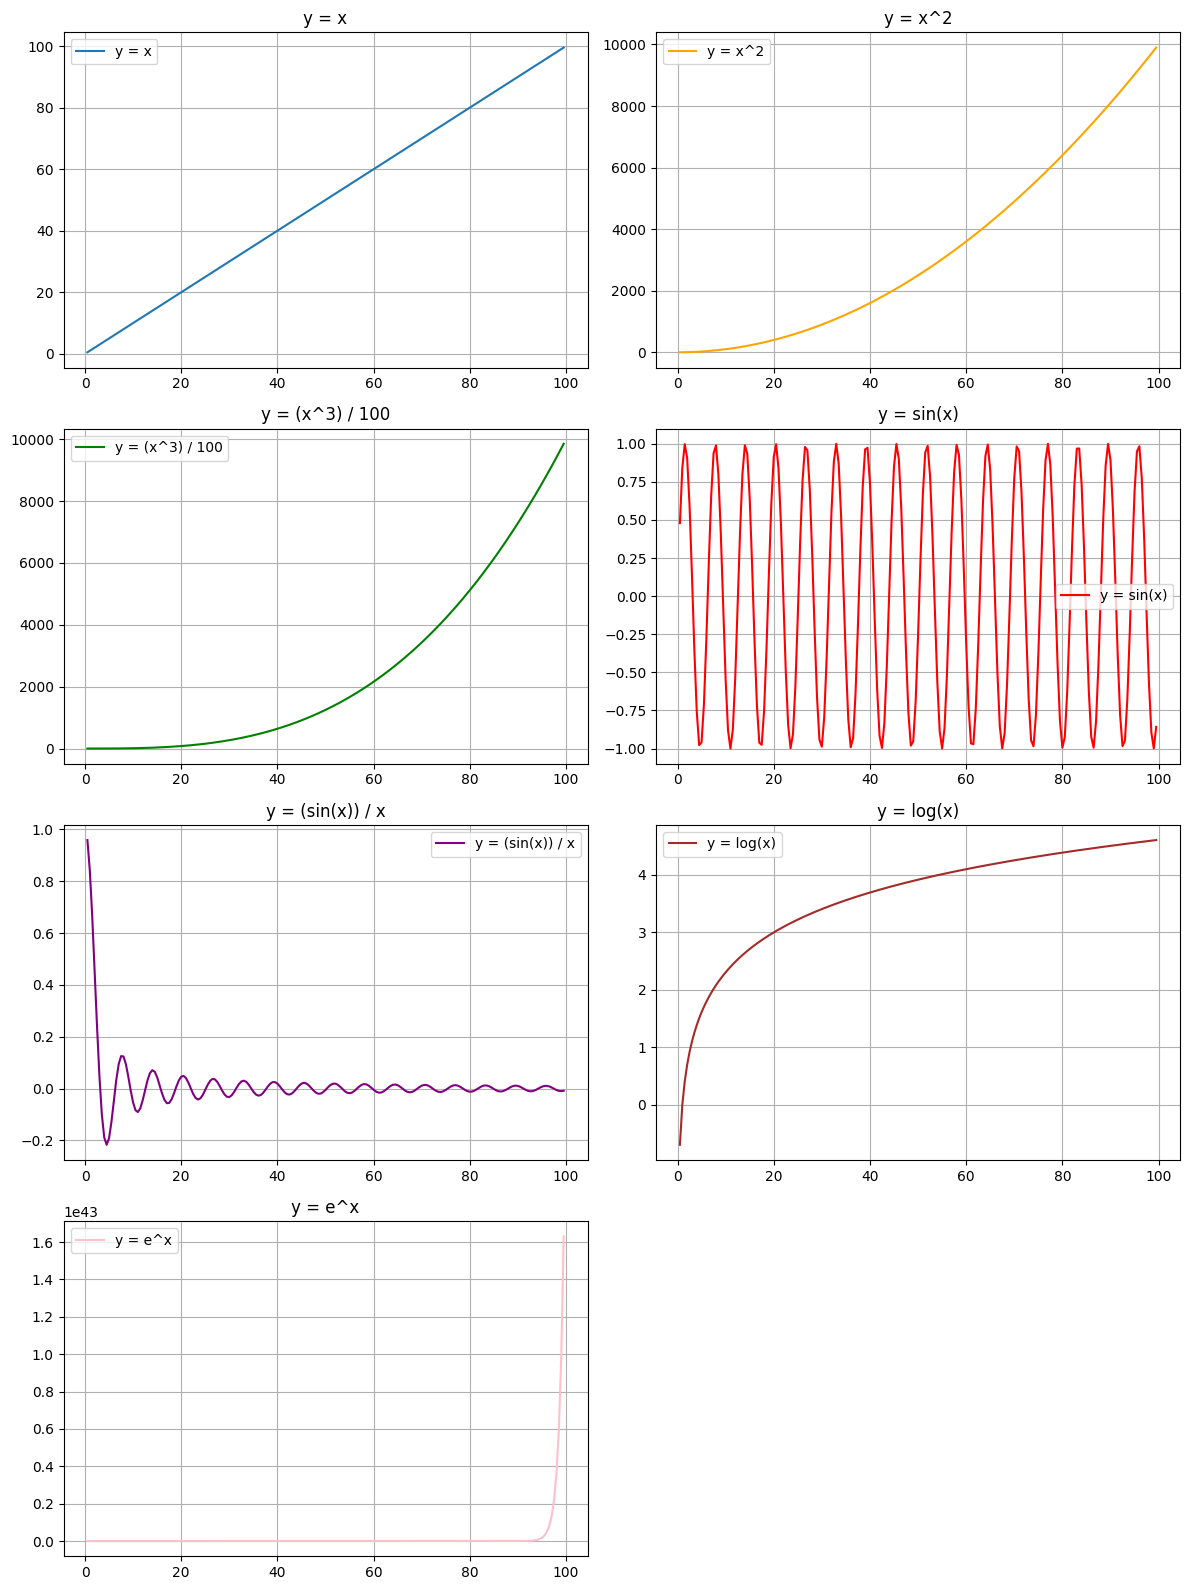

In [41]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

#  y = x
axs[0, 0].plot(x, y1, label='y = x')
axs[0, 0].set_title('y = x')
axs[0, 0].legend()
axs[0, 0].grid(True)

#  y = x^2
axs[0, 1].plot(x, y2, label='y = x^2', color='orange')
axs[0, 1].set_title('y = x^2')
axs[0, 1].legend()
axs[0, 1].grid(True)

#  y = (x^3) / 100
axs[1, 0].plot(x, y3, label='y = (x^3) / 100', color='green')
axs[1, 0].set_title('y = (x^3) / 100')
axs[1, 0].legend()
axs[1, 0].grid(True)

#  y = sin(x)
axs[1, 1].plot(x, y4, label='y = sin(x)', color='red')
axs[1, 1].set_title('y = sin(x)')
axs[1, 1].legend()
axs[1, 1].grid(True)

# y = (sin(x)) / x
axs[2, 0].plot(x, y5, label='y = (sin(x)) / x', color='purple')
axs[2, 0].set_title('y = (sin(x)) / x')
axs[2, 0].legend()
axs[2, 0].grid(True)

# y = log(x)
axs[2, 1].plot(x, y6, label='y = log(x)', color='brown')
axs[2, 1].set_title('y = log(x)')
axs[2, 1].legend()
axs[2, 1].grid(True)

# y = e^x
axs[3, 0].plot(x, y7, label='y = e^x', color='pink')
axs[3, 0].set_title('y = e^x')
axs[3, 0].legend()
axs[3, 0].grid(True)


axs[3, 1].axis('off')


plt.tight_layout()
plt.show()


**Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [6]:
import numpy as np
import pandas as pd
matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))


df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

std_devs = df.std()
max_std_column = std_devs.idxmax()
max_std_value = std_devs.max()

row_means = df.mean(axis=1)
min_mean_row_index = row_means.idxmin()
min_mean_row = df.loc[min_mean_row_index]

print("DataFrame: ")
print(df)
print("\nColumn with the highest standard deviation: ")
print(f"Column: {max_std_column}")


print("\nRow with the lowest mean:")
print(f"Row Index: {min_mean_row_index}")



DataFrame: 
           a         b         c         d         e
0   1.938555  1.266882  1.715181  1.777160  1.234555
1   1.528821  1.974035  1.203870  1.332677  1.180933
2   1.730124  1.439645  1.872129  1.102506  1.497580
3   1.585530  1.615738  1.249671  1.340349  1.978759
4   1.306619  1.921990  1.970062  1.850509  1.697124
5   1.229670  1.664158  1.403455  1.301627  1.210547
6   1.779176  1.939804  1.834499  1.932691  1.787402
7   1.544827  1.679725  1.953413  1.665999  1.592656
8   1.158207  1.650904  1.953435  1.636011  1.584436
9   1.021716  1.634093  1.974724  1.710096  1.359026
10  1.408955  1.547106  1.944736  1.170084  1.151132
11  1.552595  1.122567  1.813827  1.658288  1.636819
12  1.749747  1.214702  1.086257  1.556461  1.793879
13  1.122109  1.736669  1.577768  1.703275  1.864639
14  1.994433  1.073344  1.807690  1.956053  1.346279
15  1.643627  1.260651  1.211799  1.123107  1.679442
16  1.857334  1.456931  1.672658  1.397634  1.823564
17  1.654797  1.493209  1.230587  

**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [8]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1.0, high=2.0, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = df['f'].apply(lambda x:'LT8' if x < 8 else 'GT8')

lt8= (df['g'] == 'LT8').sum()

standard_deviation_lt8= df[df['g'] == 'LT8']['f'].std()

standard_deviation_gt8= df[df['g'] == 'GT8']['f'].std()

print("DataFrame with columns 'f' and 'g':\n", df, "\nNumber of rows where 'g' is 'LT8':", lt8)
print("\nStandard deviation of 'f' for rows where 'g' is 'LT8':", standard_deviation_lt8)
print("\nStandard deviation of 'f' for rows where 'g' is 'GT8':", standard_deviation_gt8)



DataFrame with columns 'f' and 'g':
            a         b         c         d         e         f    g
0   1.478502  1.998189  1.860122  1.826147  1.881903  9.044864  GT8
1   1.242892  1.686145  1.724057  1.726481  1.178292  7.557867  LT8
2   1.040179  1.088698  1.947904  1.169296  1.920844  7.166921  LT8
3   1.636571  1.578504  1.471020  1.940449  1.744448  8.370991  GT8
4   1.470922  1.859688  1.249204  1.297505  1.346149  7.223468  LT8
5   1.900333  1.265033  1.988031  1.828710  1.729472  8.711579  GT8
6   1.611072  1.455036  1.990827  1.642069  1.017994  7.716999  LT8
7   1.278096  1.912897  1.176801  1.611168  1.637676  7.616637  LT8
8   1.068347  1.091872  1.883514  1.081059  1.056467  6.181259  LT8
9   1.069194  1.479309  1.988211  1.753188  1.547654  7.837557  LT8
10  1.078414  1.467255  1.450307  1.828891  1.322490  7.147356  LT8
11  1.194951  1.215778  1.890922  1.593901  1.945237  7.840789  LT8
12  1.248775  1.177558  1.371958  1.898365  1.124453  6.821108  LT8
13  1.69210

**Q12. Write a small piece of code to explain broadcasting in numpy.**

In [5]:
import numpy as np

matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

B = np.array([10, 20, 30])

result = matrix + B

print("\nResult of broadcasting addition (matrix + B):")
print(result)



Result of broadcasting addition (matrix + B):
[[11 22 33]
 [14 25 36]]


**Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your soluti**

In [3]:
import numpy as np

def compute_argmin(arr):

    if arr.size == 0:
        raise ValueError("Array is empty")

    min_index = 0
    for i in range(1, arr.size):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

# Example and verification
if __name__ == "__main__":
    example_array = np.array([5, 1, 7, 4, 9, 2])
    custom_argmin = compute_argmin(example_array)
    np_argmin = np.argmin(example_array)

    print("Array:", example_array)
    print("Custom argmin index:", custom_argmin)
    print("np.argmin index:", np_argmin)


Array: [5 1 7 4 9 2]
Custom argmin index: 1
np.argmin index: 1
